<a href="https://colab.research.google.com/github/Shreedevi-Byahatti/Class-84/blob/main/youtube.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To get started with Data Visualisation, we will first import the library pandas, matplotlib.pyplot & seaborn. This sets up all the necessary components for Video Game data analysis for visual representation.
‘Pandas’ handles data like a smart table. ‘Matplotlib.pyplot’ draws data's pictures. ‘Seaborn’ makes pictures better and clearer.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Getting the file from the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
trending_video =pd.read_csv(r"/content/drive/MyDrive/youtube project/INvideos.csv")

In [ ]:
trending_video

NameError: name 'trending_video' is not defined

In the above dataset we only have category ids insted on category itself.so for this we have imported the categoriy for it and the method is used here is read_json to read the json data.

Json is the type of datatype where values are stored in the form of key value pair

In [ ]:
category_title=pd.read_json(r"/content/drive/MyDrive/youtube project/IN_category_id.json")

Converts the 'category_id' column in the DataFrame 'trending_video' to a string data type, changing its type from numeric to text.


In [ ]:
trending_video['category_id'] = trending_video['category_id'].astype(str)

The code provided below extracts data from a JSON-like structure, and the result is a Python dictionary (‘id_to_category’) that contains a mapping between category IDs and their corresponding titles.


In [ ]:
id_to_category = {}
for category in category_title['items']:
  id_to_category[category['id']] = category['snippet']['title']

The code
trending_video.insert(4, 'category', trending_video['category_id'].map(id_to_category)) adds a new column named 'category' to the 'trending_video' DataFrame at index 4.


In [ ]:
trending_video.insert(4, 'category', trending_video['category_id'].map(id_to_category))

In [ ]:
trending_video.head()

NameError: name 'trending_video' is not defined

In [ ]:
trending_video.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category',
       'category_id', 'publish_time', 'tags', 'views', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'video_error_or_removed', 'description'],
      dtype='object')

Next step is to remove all the duplicate values from dataset. “drop_duplicates” is used for this purpose.


In [ ]:
trending_video = trending_video.drop_duplicates(keep = "first")

**Question 1:Draw a horizontal bar graph to compare the number of YouTube trending videos in each category**

The given code generates a visually appealing countplot that illustrates the distribution of trending videos across different categories, making it easy to see which categories have the most and least trending videos. The plot includes labels and formatting for improved readability.

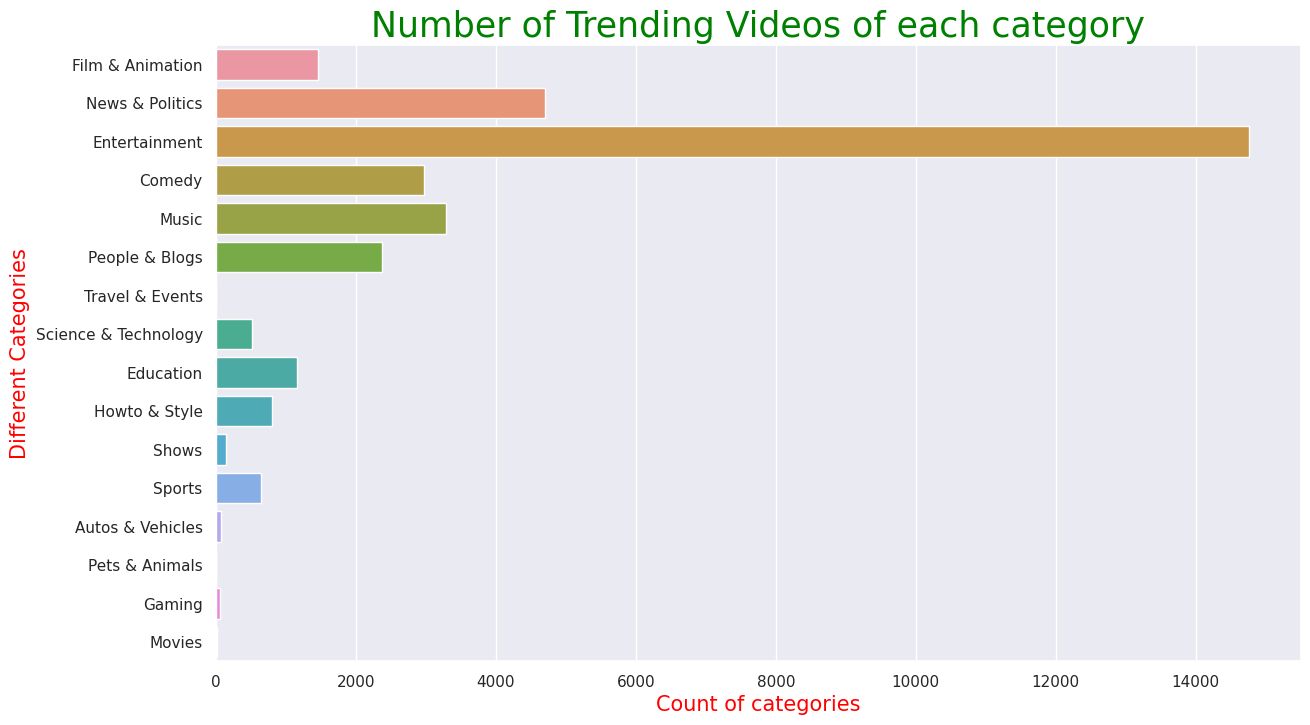

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(data=trending_video,y='category')
plt.title('Number of Trending Videos of each category',size=25,color='green')
plt.xlabel('Count of categories',color='red',size=15)
plt.ylabel('Different Categories',color='red',size=15)
plt.show()

**Question 2: Plot the comparison of  number of likes , dislikes, views and comments in different horizontal bar graphs**

The following code creates a 4x1 grid of subplots (4 plots vertically stacked), each displaying a bar plot. The `figsize` parameter sets the width and height of the entire figure to 20 inches in width and 30 inches in height. Each subplot represents statistics (likes, dislikes, comments, and views) for different video categories, making it easier to compare these metrics across categories.


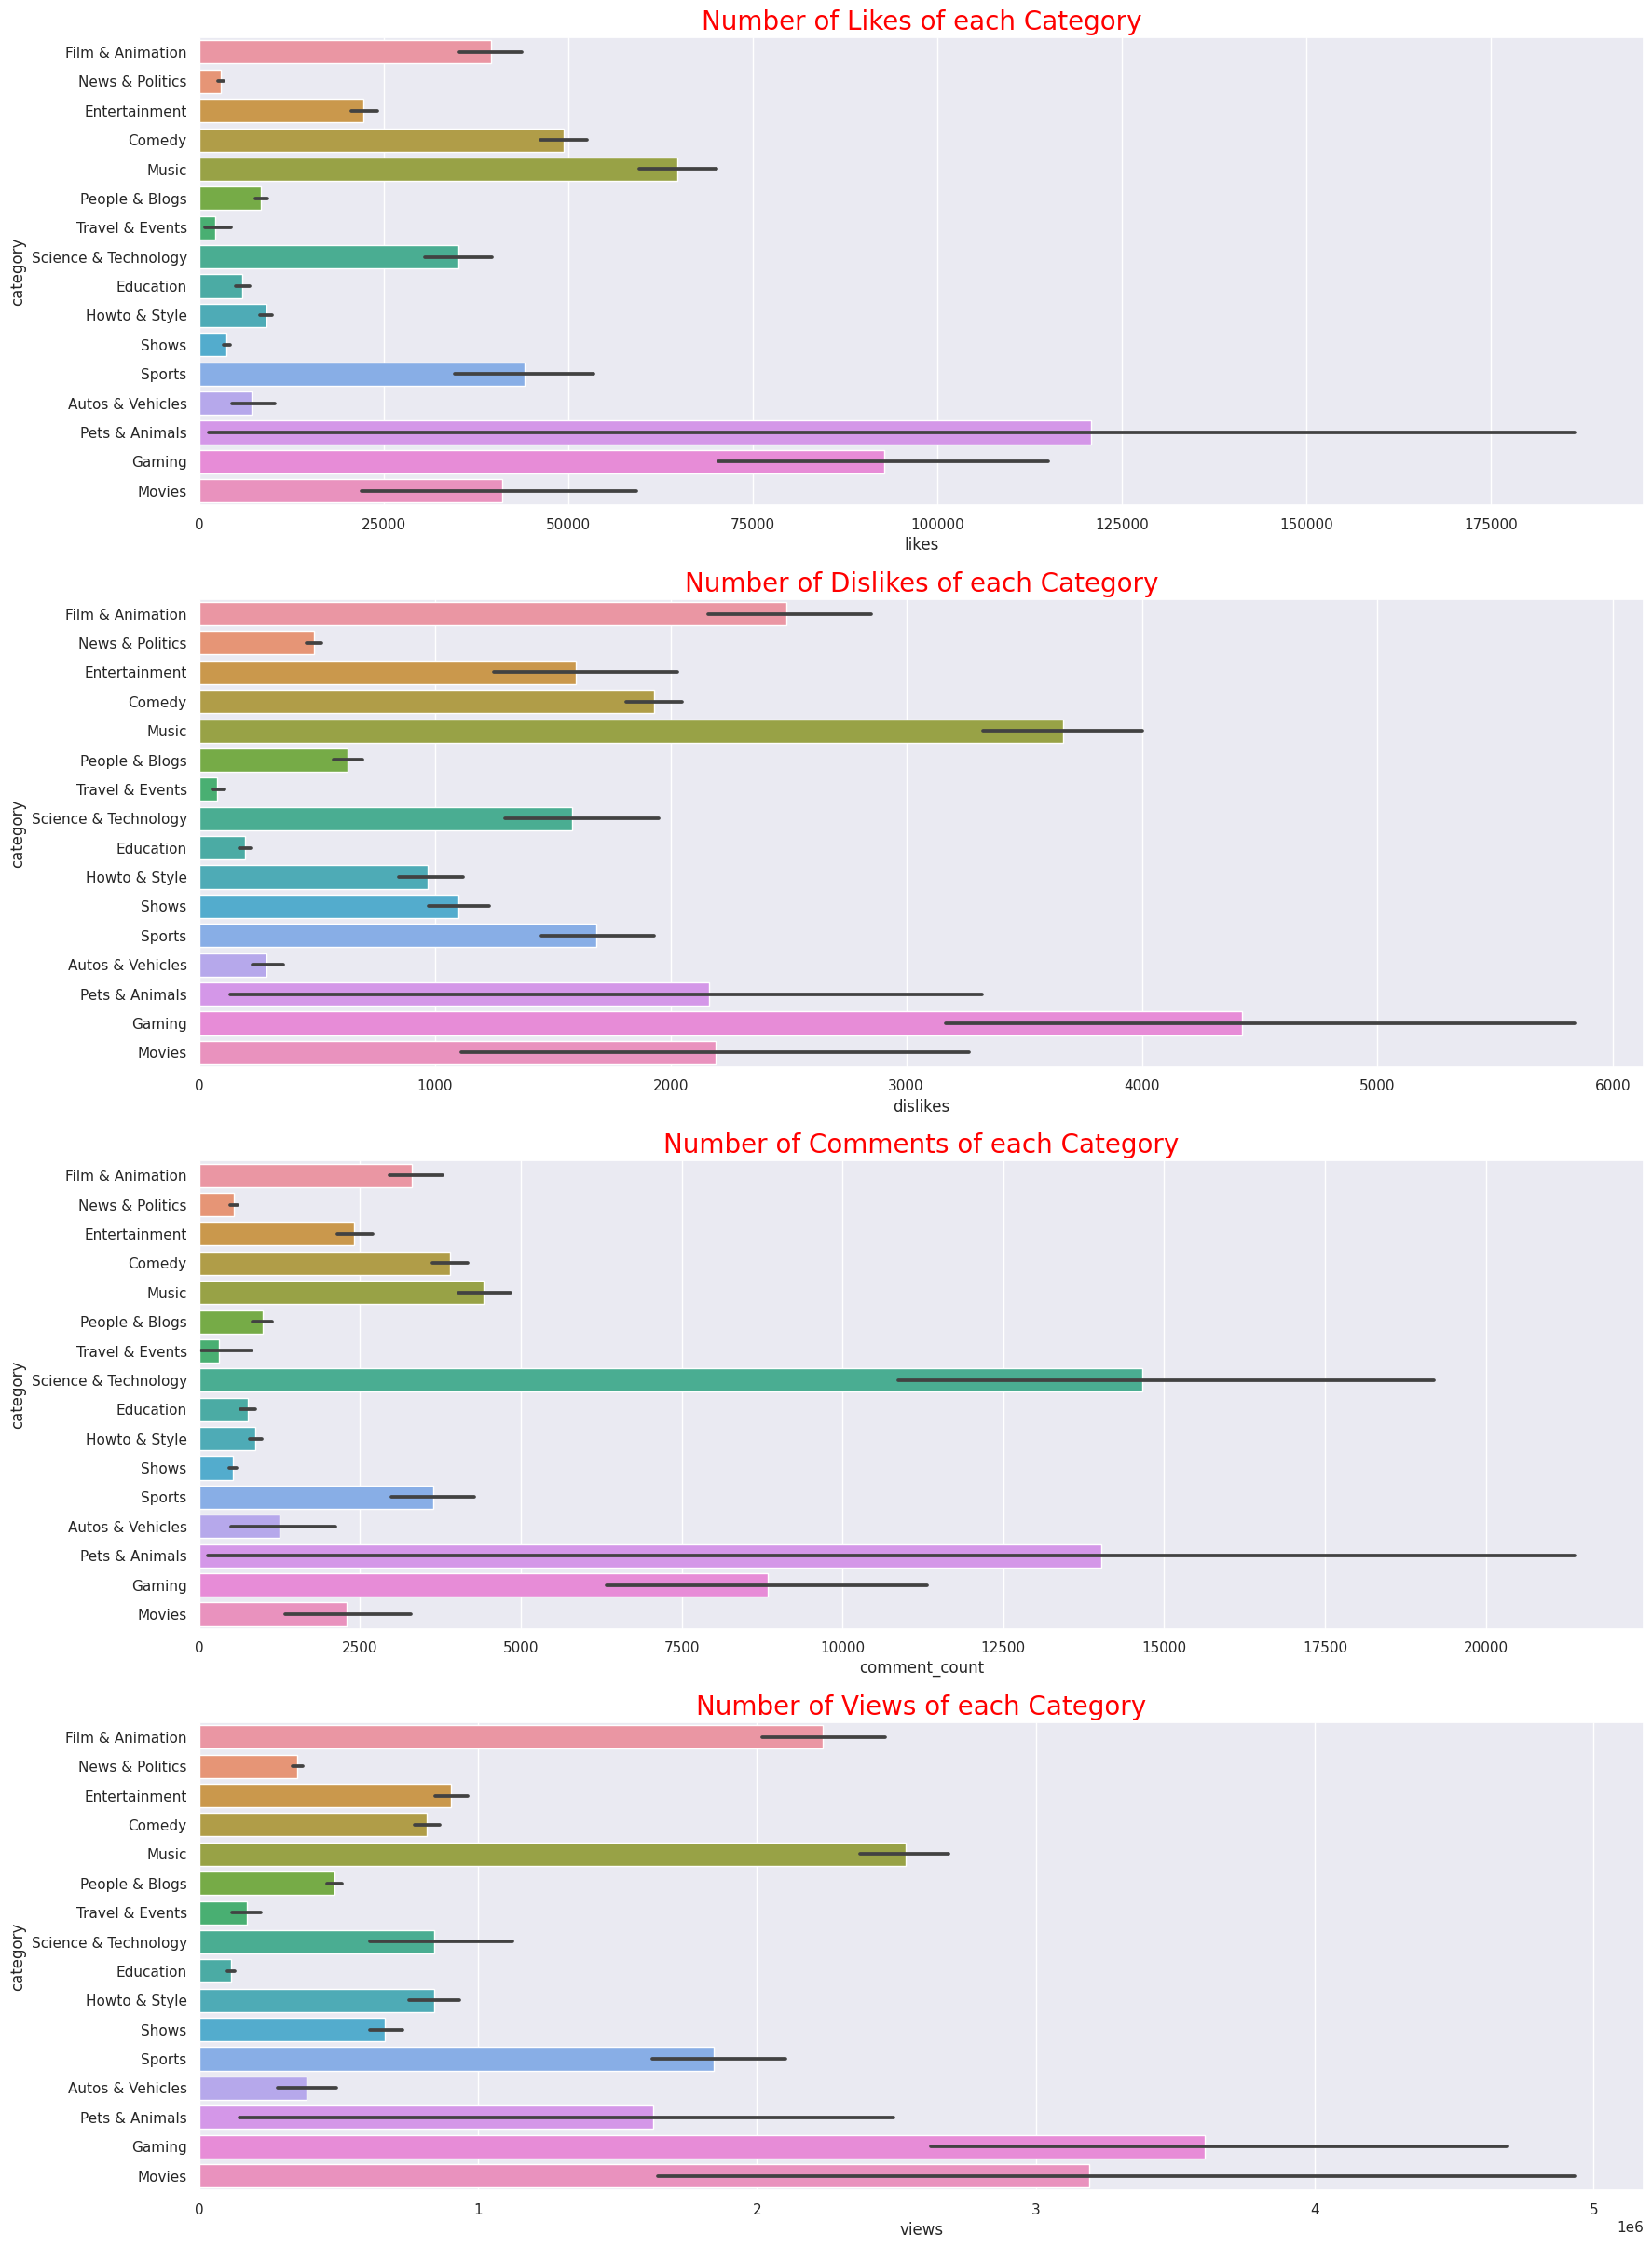

In [ ]:
#setting width and height of the plot
fig, axes = plt.subplots(4, 1,figsize=(20,30))

#Number of Likes of each Category
likes=sns.barplot(data=trending_video, x='likes', y='category', ax=axes[0])
likes.set_title("Number of Likes of each Category",color='red',size=20)

#Number of Dislikes of each Category
dislikes=sns.barplot(data=trending_video, x='dislikes', y='category', ax=axes[1])
dislikes.set_title("Number of Dislikes of each Category",color='red',size=20)

#Number of Comments of each Category
comment=sns.barplot(data=trending_video, x='comment_count', y='category', ax=axes[2])
comment.set_title("Number of Comments of each Category",color='red',size=20)

#Number of Views of each Category
views=sns.barplot(data=trending_video, x='views', y='category', ax=axes[3])
views.set_title("Number of Views of each Category",color='red',size=20)

#display all plots
plt.show()

In [ ]:
trending_video.corr()

<ipython-input-12-e25eb5f60b6b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  trending_video.corr()


,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed
views,1.000000,0.852704,0.551652,0.697749,-0.033597,-0.033643,0.006668
likes,0.852704,1.000000,0.499926,0.792815,-0.044431,-0.039304,0.034016
dislikes,0.551652,0.499926,1.000000,0.740269,-0.011098,-0.013827,0.003527
comment_count,0.697749,0.792815,0.740269,1.000000,-0.031774,-0.023412,0.018415
comments_disabled,-0.033597,-0.044431,-0.011098,-0.031774,1.000000,0.358752,-0.003066
ratings_disabled,-0.033643,-0.039304,-0.013827,-0.023412,0.358752,1.000000,-0.002444
video_error_or_removed,0.006668,0.034016,0.003527,0.018415,-0.003066,-0.002444,1.000000


**Question: Plot a correlation between likes, dislikes, comment and views of the YouTube videos through a graph.**

The best graph to plot the correlation among different columns is to plot the heatmap.A heatmap is a graphical representation of data where values in a matrix are represented as colors, helping to visualize patterns and relationships. The code below will display a heatmap representing the correlations between these selected variables.


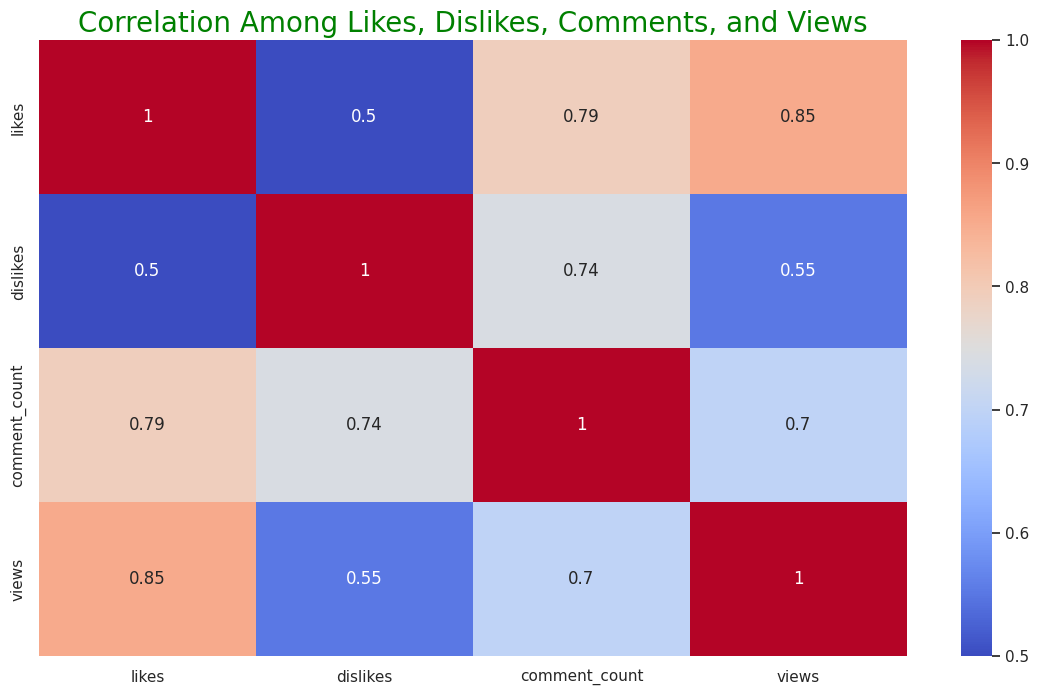

In [ ]:
plt.figure(figsize=(14, 8))
correlation_data = trending_video[['likes', 'dislikes', 'comment_count', 'views']].corr()
sns.heatmap(correlation_data, annot=True, cmap='coolwarm')
plt.title('Correlation Among Likes, Dislikes, Comments, and Views', color='green', size=20)
plt.show()